In [1]:
# preparing package, object, and library
import pandas as pd
import numpy as np 

In [2]:
# open the csv file 
pd_feature1 = pd.read_csv("data_CKSNAP.csv")
pd_feature2 = pd.read_csv("data_PseKNC.csv")
pd_feature3 = pd.read_csv("data_PSTNPss.csv") # the feature that give the best accuracy

# get the label every feature
y_feature1 = pd_feature1['Target1'] # y_feature1 = y_feature2 = y_feature3 
y_feature2 = pd_feature2['Target2']
y_feature3 = pd_feature3['Target3']

# delete column target
del pd_feature1["Target1"]
del pd_feature2["Target2"]
del pd_feature3["Target3"]

x_feature1 = pd_feature1
x_feature2 = pd_feature2
x_feature3 = pd_feature3

In [3]:
#%run ./best_featureRNA.ipynb 
# merge the feature
# 1. CKSNAP(1) and PseKNC(2)
# 2. CKSNAP and PSTNPss(3)
# 3. PseKNC and PSTNPss
# 4. CKSNAP and PseKNC and PSTNPss
nCV = 10

# don't use numpy array
# 1. CKSNAP and PseKNC
X1 = x_feature1
X2 = x_feature2
y1 = y_feature1
y2 = y_feature2 
X_merge1 = pd.concat([X1,X2], axis=1)

# 2. CKSNAP and PSTNPss(3)
X1 = x_feature1
X2 = x_feature3
y1 = y_feature1
y2 = y_feature3 
X_merge2 = pd.concat([X1,X2], axis=1)

# 3. PseKNC and PSTNPss
X1 = x_feature2
X2 = x_feature3
y1 = y_feature2
y2 = y_feature3 
X_merge3 = pd.concat([X1,X2], axis=1)

# 4. CKSNAP and PseKNC and PSTNPss
X1 = x_feature1
X2 = x_feature2
X3 = x_feature3
y1 = y_feature1  
y2 = y_feature2
y3 = y_feature3 # y1 =y2=y3 =y 

y= y3 
X_merge4 = pd.concat([X1,X2,X3], axis=1)

In [4]:
# When the value of i-th feature are zero, we will delete this feature.
def Delnullfeatures(features):
    list_delete = []
    for i in range(features.shape[1]):
        if sum(features[:,i])==0:
            list_delete.append(i)
    features_new = np.delete(features, list_delete, axis=1)
    return features_new

In [5]:
X_1 = np.array(X_merge1)
X_2 = np.array(X_merge2)
X_3 = np.array(X_merge3)
X_4 = np.array(X_merge4)
features_new1 =Delnullfeatures(features=X_1)
features_new2 =Delnullfeatures(features=X_2)
features_new3 =Delnullfeatures(features=X_3)
features_new4 =Delnullfeatures(features=X_4) 

In [6]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# 1. normalization 
from sklearn.preprocessing import MinMaxScaler


X_train1, X_test1, y_train1,y_test1 = train_test_split(features_new1, y, test_size =0.1, stratify=y)
X_train2, X_test2, y_train2,y_test2 = train_test_split(features_new2, y, test_size =0.1, stratify=y)
X_train3, X_test3, y_train3,y_test3 = train_test_split(features_new3, y, test_size =0.1, stratify=y)
X_train4, X_test4, y_train4,y_test4 = train_test_split(features_new4, y, test_size =0.1, stratify=y)

scaler = MinMaxScaler()
scaler.fit(X_train1)
X_normal1 = scaler.transform(X_train1)
scaler.fit(X_train2)
X_normal2 = scaler.transform(X_train2)
scaler.fit(X_train3)
X_normal3 = scaler.transform(X_train3)
scaler.fit(X_train4)
X_normal4 = scaler.transform(X_train4)

# 2. chi square test 
# 3. LR for generating best feature

In [7]:
f_score1 = chi2(X_normal1,y_train1)
f_score2 = chi2(X_normal2,y_train2)
f_score3 = chi2(X_normal3,y_train3)
f_score4 = chi2(X_normal4,y_train4)

In [8]:
pValue1 = pd.Series(f_score1[1])
pValue2 = pd.Series(f_score2[1])
pValue3 = pd.Series(f_score3[1])
pValue4 = pd.Series(f_score4[1])

In [9]:
pValue1.sort_values(ascending=False)

115    0.990488
14     0.987921
120    0.986746
123    0.977779
74     0.975915
         ...   
77     0.053729
10     0.049377
26     0.036588
106    0.013038
116    0.003962
Length: 130, dtype: float64

In [10]:
def get_bad_features(pValue):
    list_bad_feature=[]
    for i in range(len(pValue)):
        if pValue[i] < 0.86:
            list_bad_feature.append(i)
    return list_bad_feature

list_bad_feature1 = get_bad_features(pValue1)
list_bad_feature2 = get_bad_features(pValue2)
list_bad_feature3 = get_bad_features(pValue3)
list_bad_feature4 = get_bad_features(pValue4)

In [11]:
# reset X_train and X_test , remove the bad feature from dataset 
X_train1 = np.delete(X_train1, list_bad_feature1, axis=1)
X_train2 = np.delete(X_train2, list_bad_feature2, axis=1)
X_train3 = np.delete(X_train3, list_bad_feature3, axis=1)
X_train4 = np.delete(X_train4, list_bad_feature4, axis=1)

X_test1 = np.delete(X_test1, list_bad_feature1, axis=1)
X_test2 = np.delete(X_test2, list_bad_feature2, axis=1)
X_test3 = np.delete(X_test3, list_bad_feature3, axis=1)
X_test4 = np.delete(X_test4, list_bad_feature4, axis=1)

In [12]:
print(X_train1. shape)
print(X_train2. shape)
print(X_train3. shape)
print(X_train4. shape)

(1191, 23)
(1191, 21)
(1191, 20)
(1191, 27)


In [13]:
%run ./best_featureRNA.ipynb 
%run ./Data_Conversion_1.ipynb
%run ./ML_Module_v1.ipynb
%run ./Performances_Module_1.ipynb
%run ./Data_Visualization_1.ipynb

In [14]:
type(X_train4)

numpy.ndarray

In [15]:
type(X_test4)

numpy.ndarray

In [16]:
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)
y_train3 = np.array(y_train3)
y_test3 = np.array(y_test3)
y_train4 = np.array(y_train4)
y_test4 = np.array(y_test4)

In [17]:
tt_data1,tt_targets1,tv_data1,tv_targets1 = CF_Validation(nCV,X_train1,y_train1)
t_vec_train1,t_vec_val1 = get_vec_data(tt_data1,tt_targets1,nCV), get_vec_data(tv_data1,tv_targets1,nCV)
t_vec_test1= [X_test1,y_test1]

tt_data2,tt_targets2,tv_data2,tv_targets2 = CF_Validation(nCV,X_train2,y_train2)
t_vec_train2,t_vec_val2 = get_vec_data(tt_data2,tt_targets2,nCV), get_vec_data(tv_data2,tv_targets2,nCV)
t_vec_test2= [X_test2,y_test2]

tt_data3,tt_targets3,tv_data3,tv_targets3 = CF_Validation(nCV,X_train3,y_train3)
t_vec_train3,t_vec_val3 = get_vec_data(tt_data3,tt_targets3,nCV), get_vec_data(tv_data3,tv_targets3,nCV)
t_vec_test3= [X_test3,y_test3]

tt_data4,tt_targets4,tv_data4,tv_targets4 = CF_Validation(nCV,X_train4,y_train4)
t_vec_train4,t_vec_val4 = get_vec_data(tt_data4,tt_targets4,nCV), get_vec_data(tv_data4,tv_targets4,nCV)
t_vec_test4= [X_test4,y_test4]

In [18]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'AB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'AB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'AB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'AB4')

AB_total_performances_train1,AB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
AB_total_performances_train2,AB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
AB_total_performances_train3,AB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
AB_total_performances_train4,AB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [19]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'GB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'GB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'GB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'GB4')

GB_total_performances_train1,GB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
GB_total_performances_train2,GB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
GB_total_performances_train3,GB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
GB_total_performances_train4,GB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)




In [20]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'RF1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'RF2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'RF3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'RF4')

RF_total_performances_train1,RF_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
RF_total_performances_train2,RF_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
RF_total_performances_train3,RF_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
RF_total_performances_train4,RF_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [21]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'XGB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'XGB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'XGB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'XGB4')

XGB_total_performances_train1,XGB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
XGB_total_performances_train2,XGB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
XGB_total_performances_train3,XGB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
XGB_total_performances_train4,XGB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [22]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'Stacking1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'Stacking2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'Stacking3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'Stacking4')

Stacking_total_performances_train1,Stacking_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
Stacking_total_performances_train2,Stacking_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
Stacking_total_performances_train3,Stacking_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
Stacking_total_performances_train4,Stacking_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [23]:
AB_tot_perf_train = [AB_total_performances_train1, AB_total_performances_train2, 
                     AB_total_performances_train3, AB_total_performances_train4]
AB_tot_perf_test = [AB_total_performances_test1, AB_total_performances_test2, 
                    AB_total_performances_test3, AB_total_performances_test4]
GB_tot_perf_train = [GB_total_performances_train1, GB_total_performances_train2, 
                     GB_total_performances_train3,GB_total_performances_train4]
GB_tot_perf_test = [GB_total_performances_test1, GB_total_performances_test2, 
                    GB_total_performances_test3,GB_total_performances_test4]
RF_tot_perf_train = [RF_total_performances_train1, RF_total_performances_train2,
                     RF_total_performances_train3,RF_total_performances_train4]
RF_tot_perf_test = [RF_total_performances_test1, RF_total_performances_test2, 
                    RF_total_performances_test3,RF_total_performances_test4]
XGB_tot_perf_train = [XGB_total_performances_train1, XGB_total_performances_train2, 
                      XGB_total_performances_train3,XGB_total_performances_train4]
XGB_tot_perf_test = [XGB_total_performances_test1,XGB_total_performances_test2, 
                     XGB_total_performances_test3,XGB_total_performances_test4]
Stacking_tot_perf_train = [Stacking_total_performances_train1, Stacking_total_performances_train2, 
                           Stacking_total_performances_train3,Stacking_total_performances_train4]
Stacking_tot_perf_test = [Stacking_total_performances_test1,Stacking_total_performances_test2, 
                          Stacking_total_performances_test3,Stacking_total_performances_test4]

Create_Tables_RNA_fusion(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Create_Tables_RNA_fusion(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Create_Tables_RNA_fusion(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Create_Tables_RNA_fusion(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Create_Tables_RNA_fusion(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')

+-------------------+--------------+-------+-------+-------+-------+-------+
| mTrain Model Name |  Data Type   |  ACC  |   SN  |   SP  |  MCC  |  AUC  |
+-------------------+--------------+-------+-------+-------+-------+-------+
|      adaboost     | feature_new1 |  0.67 | 0.667 | 0.674 | 0.341 |  0.67 |
|      adaboost     | feature_new2 | 0.912 |  0.91 | 0.914 | 0.824 | 0.912 |
|      adaboost     | feature_new3 | 0.913 | 0.915 | 0.911 | 0.825 | 0.913 |
|      adaboost     | feature_new4 | 0.905 | 0.911 | 0.898 |  0.81 | 0.905 |
+-------------------+--------------+-------+-------+-------+-------+-------+
+------------------+--------------+-------+-------+-------+-------+-------+
| mTest Model Name |  Data Type   |  ACC  |   SN  |   SP  |  MCC  |  AUC  |
+------------------+--------------+-------+-------+-------+-------+-------+
|     adaboost     | feature_new1 | 0.517 | 0.479 | 0.554 | 0.033 | 0.516 |
|     adaboost     | feature_new2 | 0.904 | 0.921 | 0.886 | 0.808 | 0.904 |
|   

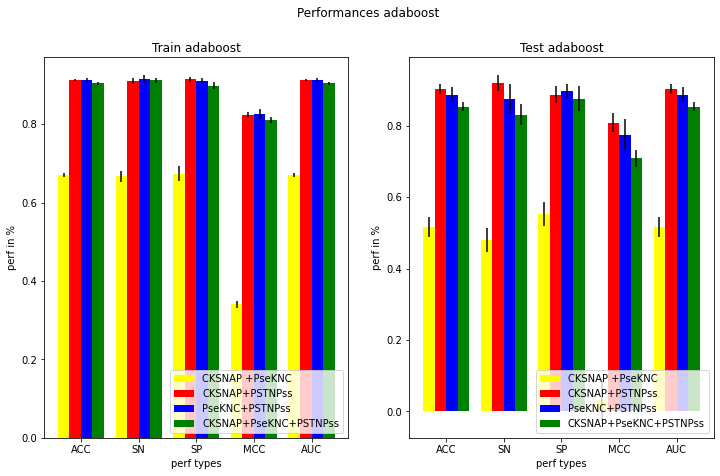

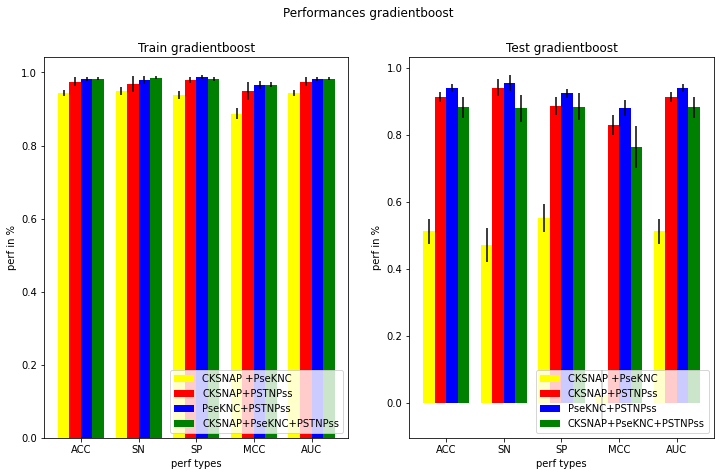

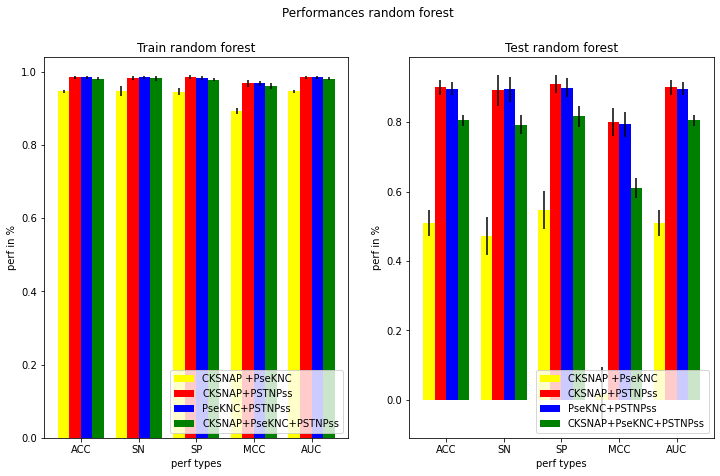

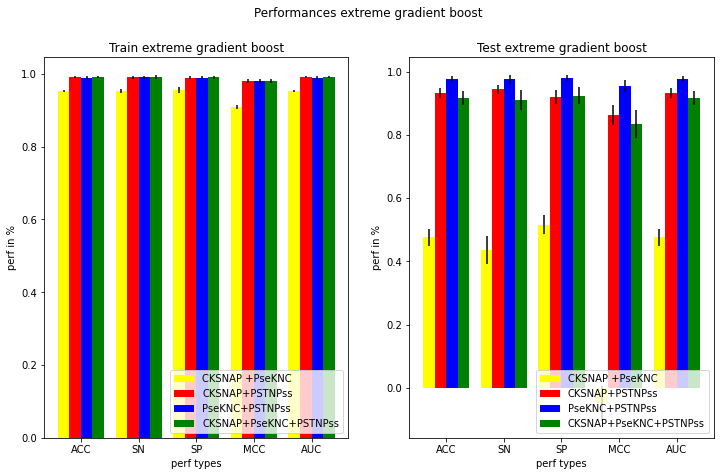

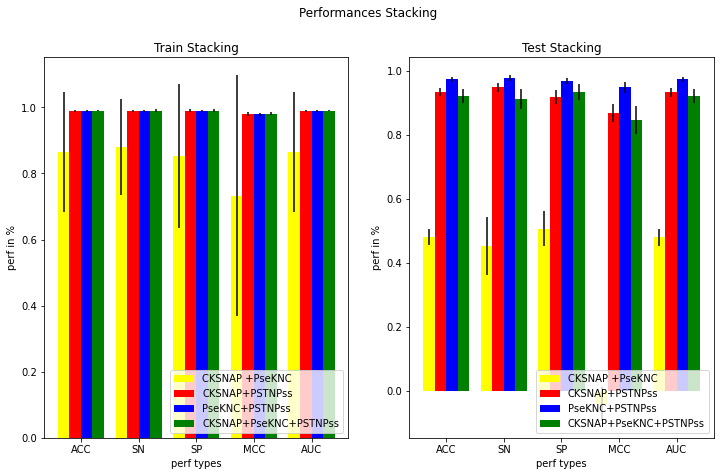

In [24]:
Plot_Performances_RNA_fusion(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Plot_Performances_RNA_fusion(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Plot_Performances_RNA_fusion(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Plot_Performances_RNA_fusion(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Plot_Performances_RNA_fusion(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')